<a href="https://colab.research.google.com/github/SifolDifol/HomeWorkForCourse/blob/pandas-%2F-numpy/%D0%90%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%93%D0%B0%D0%B2%D1%80%D0%B8%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Проведите первичный анализ данных
    * Изучите данные
    * Обработайте пропуски
    * Преобразуйте признаки, если требуются
    * Постройте графики для общего понимания о данных
    
    2. Проверьте данные на нормальность (2-3 стобца)
    * Объясните выбор теста

    3. Выдвинете гипотезу (минимум 2), проверьте ее, не забывая объясняя свой выбор

In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn import preprocessing

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
howpop_train = pd.read_csv('drive/MyDrive/Colab Notebooks/dataForWork/howpop_train.csv')

Общее изучение данных

In [88]:
howpop_train.head(50)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356
5,https://habrahabr.ru/post/18295/,habrahabr.ru,18295,2008-01-02 16:14:00,@lvea,develop,False,3171,Mobile2.0 Всеобщая доступность,22,1,192,9.0,2.0,-0.950075,-0.825149,0.016555
6,https://geektimes.ru/post/18306/,geektimes.ru,18306,2008-01-03 12:55:00,@abbasov,NaN,False,435,Modbook в действии,10,0,301,5.0,1.0,-0.402140,-1.278643,-0.355525
7,https://habrahabr.ru/post/18311/,habrahabr.ru,18311,2008-01-03 17:20:00,@Andrey,misc,False,3291,В чем суть проекта Vladelia.ru,64,1,141,17.0,20.0,-1.168569,-0.822414,0.801626
8,https://habrahabr.ru/post/31352/,habrahabr.ru,31352,2008-01-03 22:54:00,@kvladimir,develop,False,1953,Подтверждено: Wikia Search запускается в понед...,23,2,208,21.0,3.0,-0.878984,-0.525245,0.041000
9,https://habrahabr.ru/post/18314/,habrahabr.ru,18314,2008-01-03 23:56:00,@lvea,develop,False,3712,Mobile 2.0 Выбор предпочтительного способа связи,6,1,401,2.0,0.0,-0.389766,-0.817507,-0.896510


In [89]:
howpop_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

In [90]:
howpop_train.isnull().sum()

,0
url,0
domain,0
post_id,0
published,0
author,36480
flow,37089
polling,0
content_len,0
title,0
comments,0


In [91]:
howpop_train.describe(include='object')

,url,domain,published,author,flow,title
count,134137,134137,134137,97657,97048,134137
unique,134137,2,130291,22077,6,133628
top,https://habrahabr.ru/post/18284/,habrahabr.ru,2011-06-14 15:52:00,@alizar,develop,"Интересные события, произошедшие в выходные"
freq,1,97048,39,5292,53318,56


Заполнение пропусков данными легкимя для выявления

In [92]:
howpop_train['author'] = howpop_train['author'].fillna('@unknown_authors')
howpop_train['flow'] = howpop_train['flow'].fillna('unknown_flow')
howpop_train['votes_plus'] = howpop_train['votes_plus'].fillna(0.123)
howpop_train['votes_minus'] = howpop_train['votes_minus'].fillna(0.123)

In [93]:
howpop_train.isnull().sum()

,0
url,0
domain,0
post_id,0
published,0
author,0
flow,0
polling,0
content_len,0
title,0
comments,0


Проверка статей на длинну

In [94]:
howpop_train['content_len'].value_counts()

,count
content_len,
1,937
137,38
1545,33
1157,32
1570,32
...,...
23656,1
27243,1
28529,1


Возможно статьи с длинной в 1 символ являются выбросом

In [95]:
howpop_train_len_nonfiltred = howpop_train[howpop_train['content_len'] == 1]

In [96]:
howpop_train_len_nonfiltred.head(50)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
15,https://habrahabr.ru/post/35218/,habrahabr.ru,35218,2008-01-04 19:04:00,@napster,develop,True,1,Кто должен писать JS код в процессе работы над...,105,1,1200,25.0,14.0,0.415985,-0.812524,1.144618
121,https://habrahabr.ru/post/35229/,habrahabr.ru,35229,2008-01-12 15:21:00,@xstb,misc,True,1,Как вы плюсуете (минусуете) пост на Хабре?,33,1,172,24.0,11.0,-1.019527,-0.801686,0.245253
160,https://geektimes.ru/post/35233/,geektimes.ru,35233,2008-01-15 01:21:00,@suckdontbite,unknown_flow,True,1,А как вы относитесь к рекламным роликам компан...,9,0,106,4.0,12.0,-1.408036,-1.251695,-0.521755
175,https://habrahabr.ru/post/35235/,habrahabr.ru,35235,2008-01-15 17:37:00,@Miyazaki,misc,True,1,"Хабранарод, как часто вы пользуетесь хабрапочтой",0,0,108,0.0,0.0,-1.333325,-1.259873,-2.261849
180,https://geektimes.ru/post/35236/,geektimes.ru,35236,2008-01-16 00:36:00,@porchini,unknown_flow,True,1,"Если у вас MacBook (Pro, Air), то пользуетесь ...",44,0,2800,13.0,11.0,1.657767,-1.239927,0.613591
181,https://geektimes.ru/post/35237/,geektimes.ru,35237,2008-01-16 00:50:00,@suckdontbite,unknown_flow,True,1,Вы довольны новинками с Macworld'а?,72,0,257,22.0,9.0,-0.571249,-1.222916,0.989433
232,https://habrahabr.ru/post/35243/,habrahabr.ru,35243,2008-01-18 14:44:00,@eklektikos,design,True,1,Где Вы находите идеи при создании дизайна сайта?,8,2,2100,0.0,0.0,0.957382,-0.497614,-0.652093
265,https://habrahabr.ru/post/35249/,habrahabr.ru,35249,2008-01-20 21:46:00,@mib32,misc,True,1,"ХабраRSS без катов в топиках, быть?",137,0,199,29.0,2.0,-0.892050,-1.250958,1.250950
268,https://habrahabr.ru/post/35251/,habrahabr.ru,35251,2008-01-20 22:55:00,@artch,develop,True,1,В чем хабралюди пишут PHP-код?,343,17,3900,35.0,7.0,1.322900,0.646919,1.917301
309,https://geektimes.ru/post/35258/,geektimes.ru,35258,2008-01-22 17:47:00,@TiGR,unknown_flow,True,1,Свой выбор операционной системы…,30,0,443,17.0,17.0,-0.150013,-1.208574,0.203701


После анализа было выявлено что статьи с длинной в 1 символ являются опросниками и не являются ошибочными данными

In [97]:
howpop_train.shape

(134137, 17)

Просмотр данных для будущего анализа

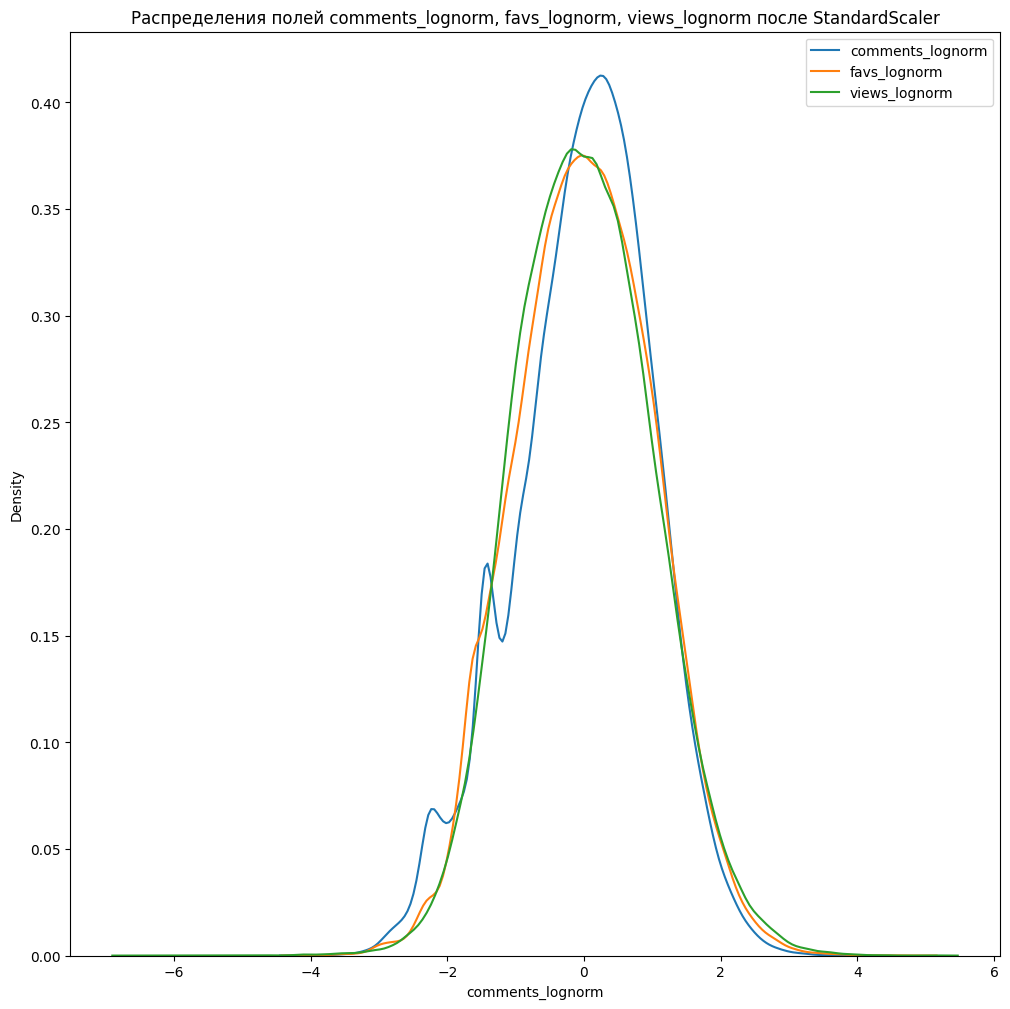

In [98]:
s_scaler = preprocessing.StandardScaler()
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 12))
ax1.set_title('Распределения полей comments_lognorm, favs_lognorm, views_lognorm после StandardScaler')
sns.kdeplot(howpop_train['comments_lognorm'], ax=ax1, label ='comments_lognorm')
sns.kdeplot(howpop_train['favs_lognorm'], ax=ax1, label ='favs_lognorm')
sns.kdeplot(howpop_train['views_lognorm'], ax=ax1, label ='views_lognorm')
plt.legend()

Text(0, 0.5, 'Количество просмотров')

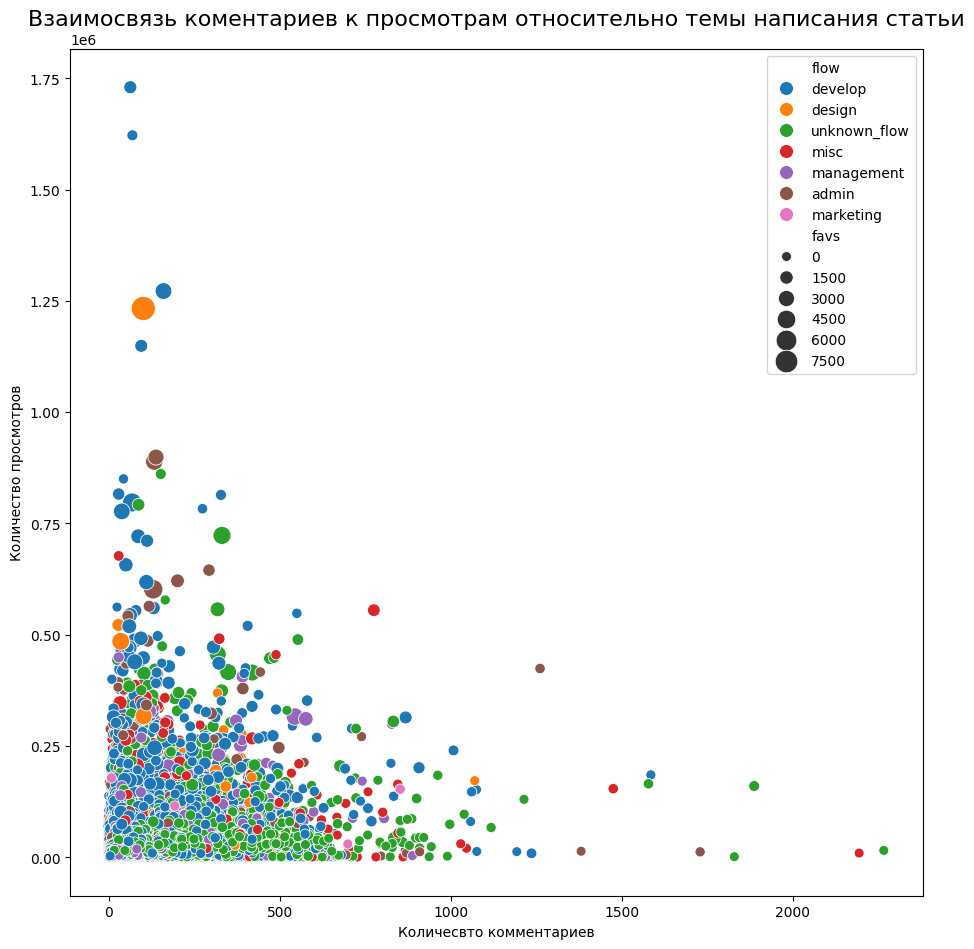

In [99]:
fig = plt.figure(figsize=(11, 11))

scatterplot = sns.scatterplot(
    data=howpop_train,
    x='comments',
    y='views',
    hue='flow',
    s=100,
    size='favs',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь коментариев к просмотрам относительно темы написания статьи', fontsize=16)
scatterplot.set_xlabel('Количесвто комментариев')
scatterplot.set_ylabel('Количество просмотров')

Проверка на нормальность столбцов comments_lognorm, favs_lognorm, views_lognorm.

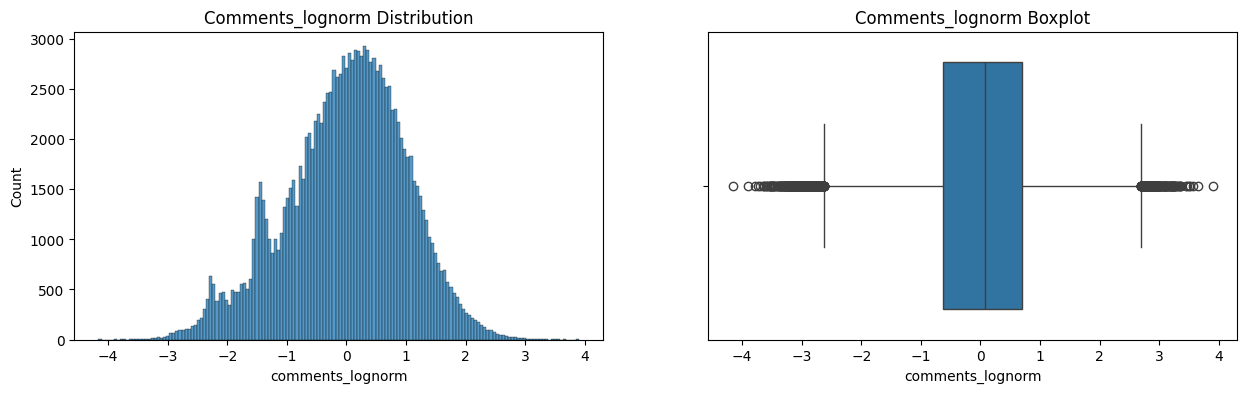

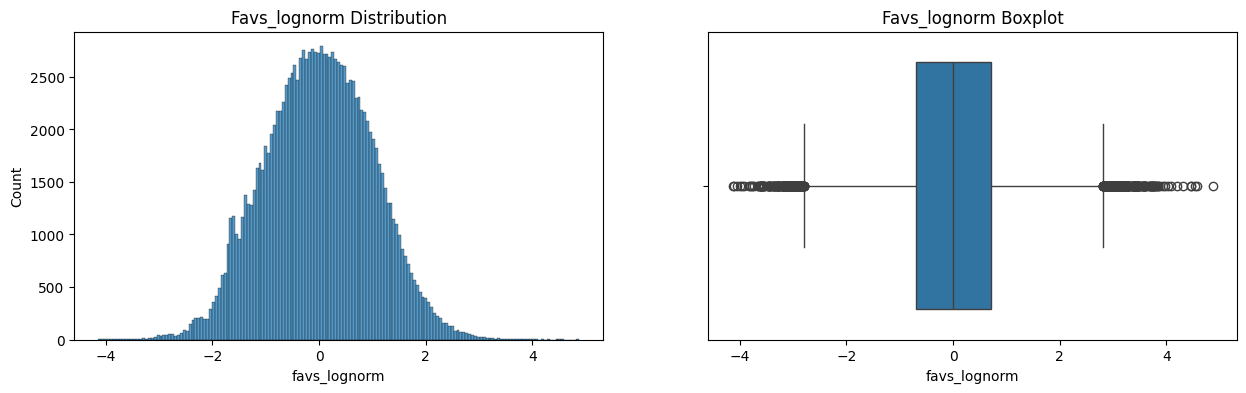

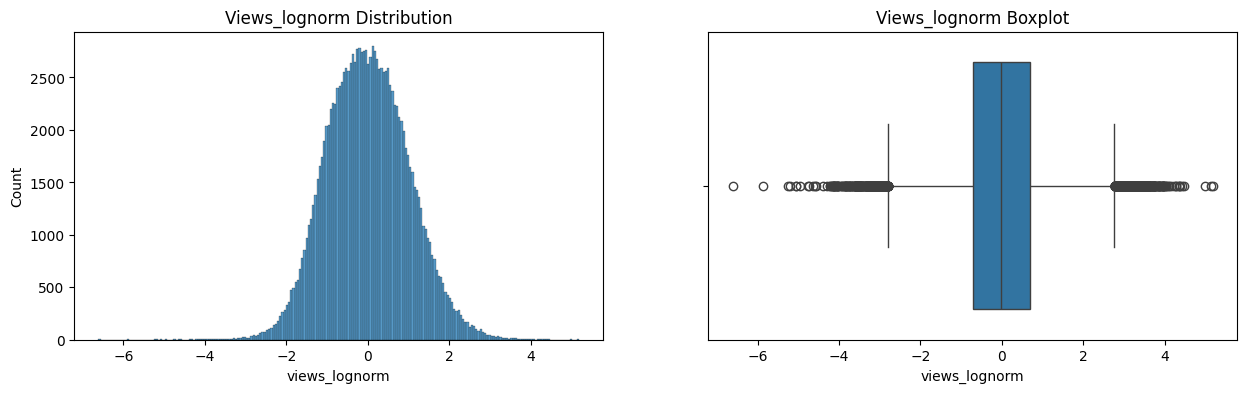

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=howpop_train, x='comments_lognorm', ax=axes[0]);
histplot.set_title('Comments_lognorm Distribution');
boxplot = sns.boxplot(data=howpop_train, x='comments_lognorm', ax=axes[1]);
boxplot.set_title('Comments_lognorm Boxplot');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=howpop_train, x='favs_lognorm', ax=axes[0]);
histplot.set_title('Favs_lognorm Distribution');
boxplot = sns.boxplot(data=howpop_train, x='favs_lognorm', ax=axes[1]);
boxplot.set_title('Favs_lognorm Boxplot');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=howpop_train, x='views_lognorm', ax=axes[0]);
histplot.set_title('Views_lognorm Distribution');
boxplot = sns.boxplot(data=howpop_train, x='views_lognorm', ax=axes[1]);
boxplot.set_title('Views_lognorm Boxplot');

Данные столбцы распределены нормально, но с большим количесвом выбросов по минимуму и максимуму поэтому применим метод Тьюки.

In [101]:
def outliers_iqr(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [102]:
outliers, cleaned = outliers_iqr(howpop_train, 'comments_lognorm')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 952
Результирующее число записей: 133185


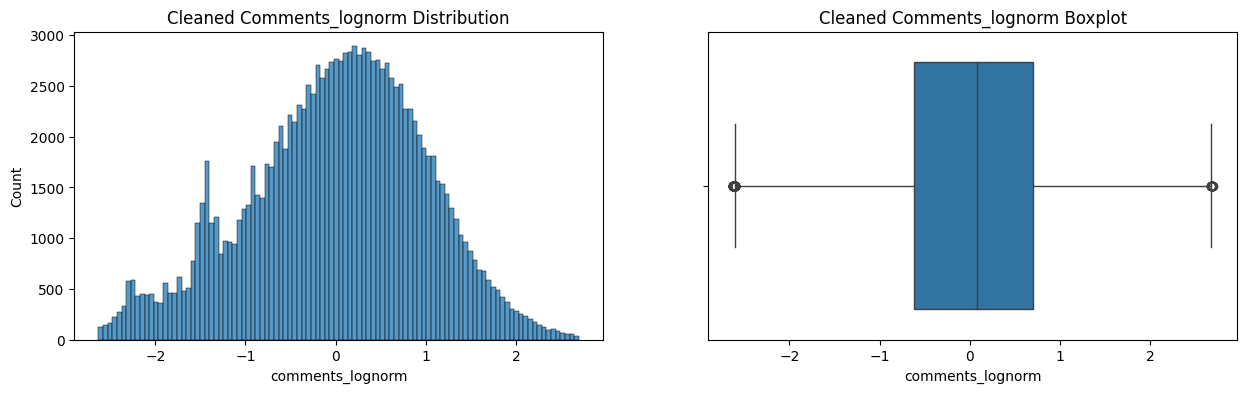

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='comments_lognorm', ax=axes[0]);
histplot.set_title('Cleaned Сomments_lognorm Distribution');
boxplot = sns.boxplot(data=cleaned, x='comments_lognorm', ax=axes[1]);
boxplot.set_title('Cleaned Сomments_lognorm Boxplot');

Столбец Сomments_lognorm после применения метода Тьюки.

In [104]:
outliers, cleaned = outliers_iqr(howpop_train, 'favs_lognorm')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 616
Результирующее число записей: 133521


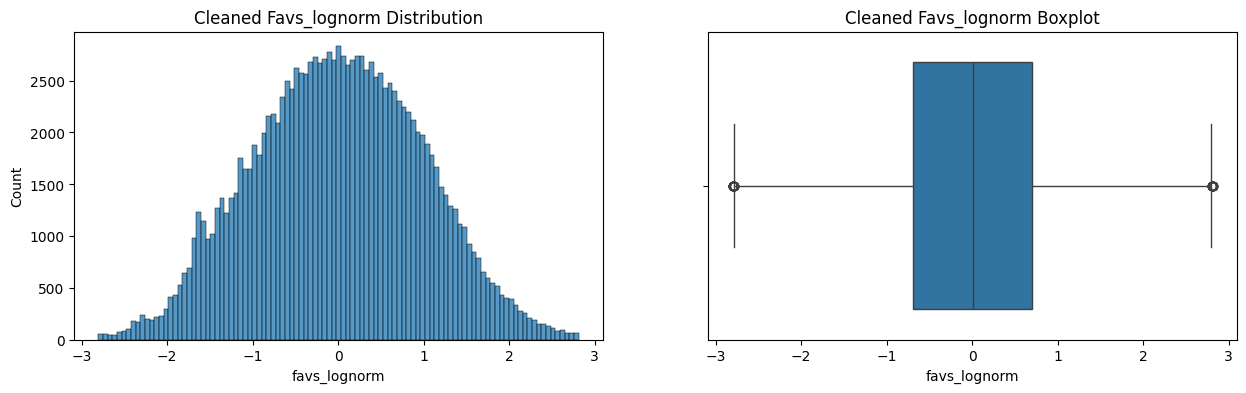

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='favs_lognorm', ax=axes[0]);
histplot.set_title('Cleaned Favs_lognorm Distribution');
boxplot = sns.boxplot(data=cleaned, x='favs_lognorm', ax=axes[1]);
boxplot.set_title('Cleaned Favs_lognorm Boxplot');

Столбец Favs_lognorm после применения метода Тьюки.

In [107]:
outliers, cleaned = outliers_iqr(howpop_train, 'views_lognorm')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 873
Результирующее число записей: 133264


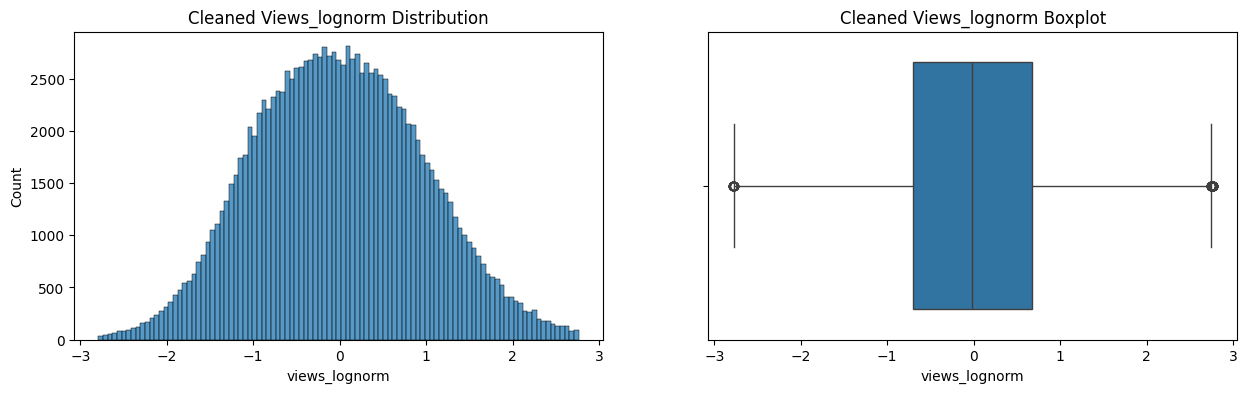

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='views_lognorm', ax=axes[0]);
histplot.set_title('Cleaned Views_lognorm Distribution');
boxplot = sns.boxplot(data=cleaned, x='views_lognorm', ax=axes[1]);
boxplot.set_title('Cleaned Views_lognorm Boxplot');

Столбец Views_lognorm после применения метода Тьюки.

Гипотеза №1: Большинство статей публикубтся в вечернее время суток.
Для проверки гипотезы построим тепловую карту распределения постов по часам и минутам. Для построения карты придется произвести работу над данными это показано ниже.

In [109]:
howpop_train_pub = howpop_train.drop(['url','domain','post_id','author','flow','polling','content_len','title','comments','favs','views','votes_plus','votes_minus','views_lognorm','favs_lognorm','comments_lognorm'], axis=1)


In [110]:
howpop_train_pub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   published  134137 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB


In [111]:
howpop_train_pub['published'] = pd.to_datetime(howpop_train_pub['published'])

In [112]:
howpop_train_pub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   published  134137 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.0 MB


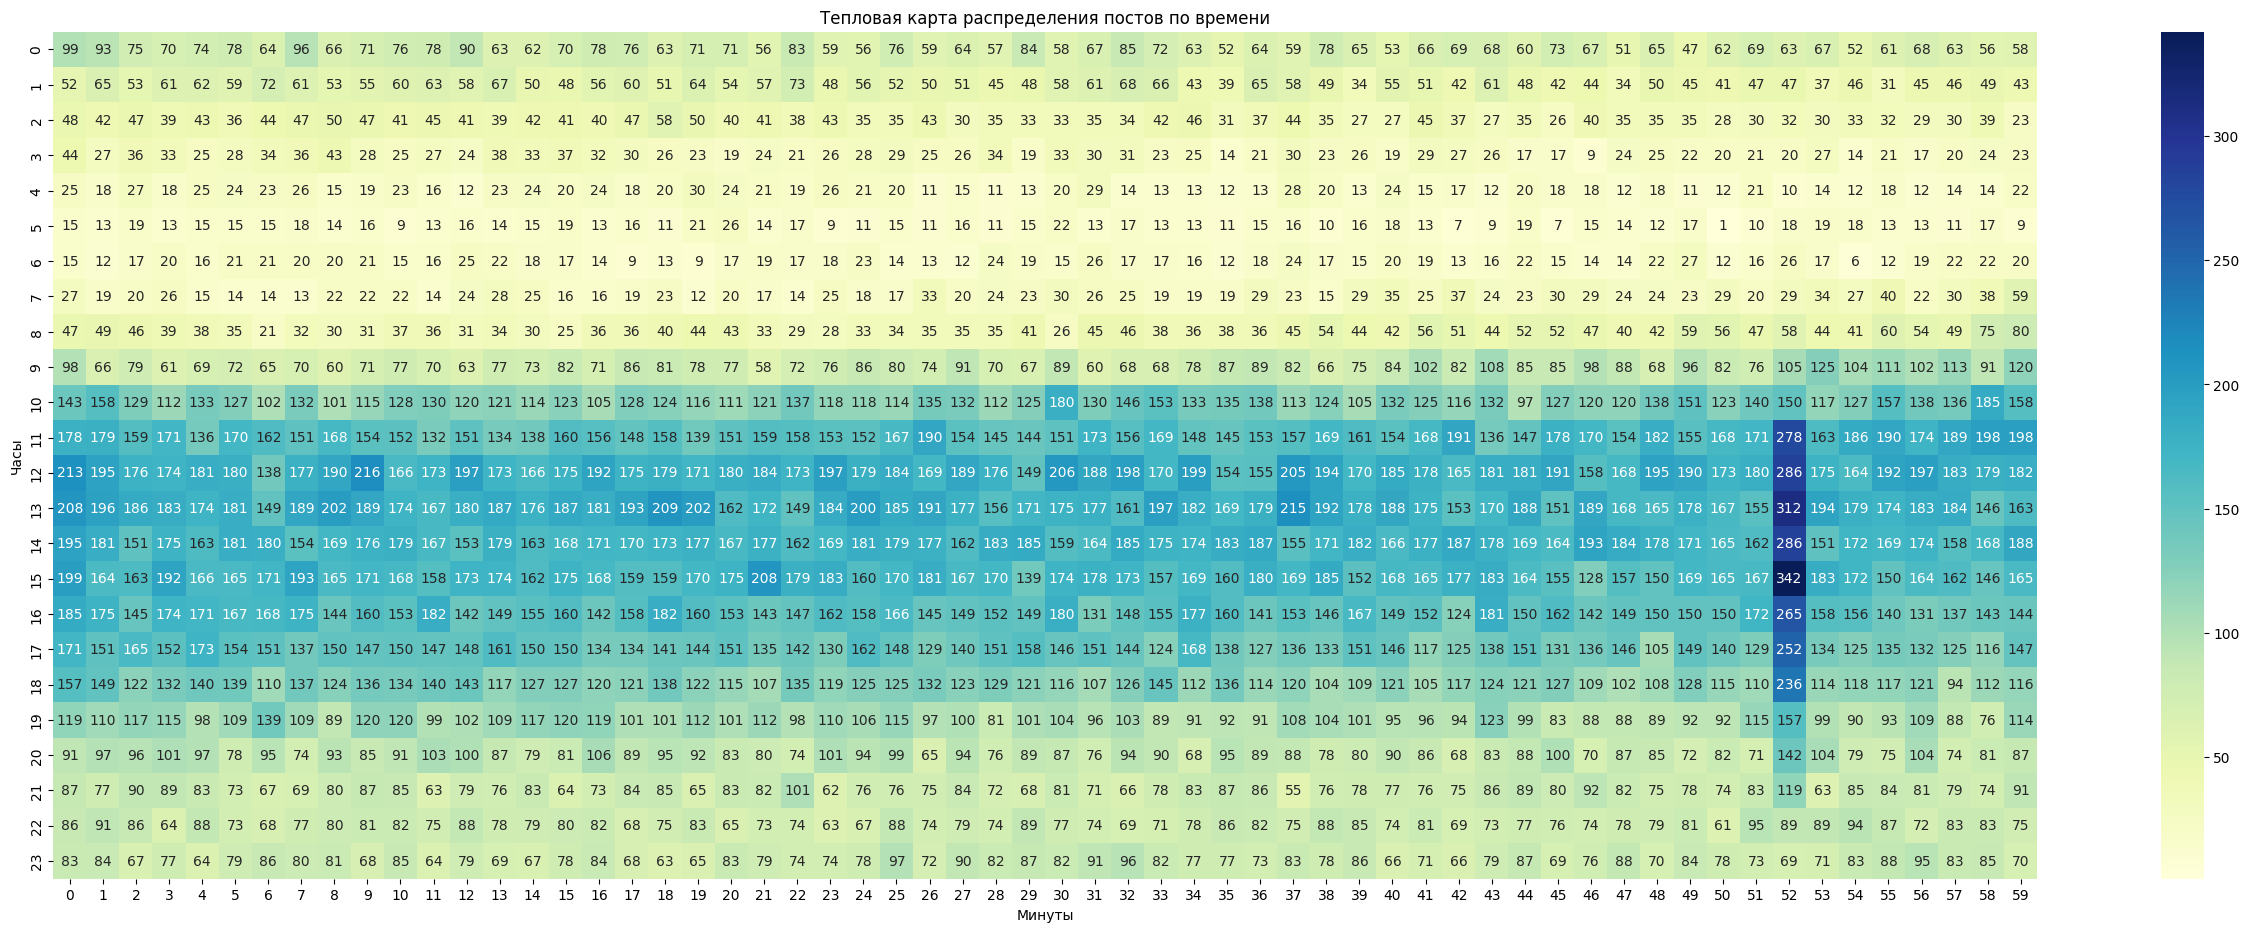

In [113]:
howpop_train_pub.index = pd.to_datetime(howpop_train_pub['published'])

howpop_train_pub['hour'] = howpop_train_pub.index.hour
howpop_train_pub['minute'] = howpop_train_pub.index.minute

heatmap_data = howpop_train_pub.groupby(['hour','minute']).size().unstack(fill_value=0)

plt.figure(figsize=(32, 11))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Тепловая карта распределения постов по времени')
plt.xlabel('Минуты')
plt.ylabel('Часы')
plt.show()



Гипотеза не подтвердилась основыне часы публикаций приходятся на промежуток между 9ю часами и 20ю часами захватывая как день так и вечер, но в ходе была обнаружена интересная особенность. Часть публикация ненормально распределены в конкретном временном промежутке между 11 и 18 часами включительно в конкретную 52ю минуту каждого часа, что является подозрительным.

Гипотеза №2: Больше всего положительных оценок на статьях с категрией develop, а меньше всего будет у статей с пропуском категории которые были заполнены категорией unknown_flow.

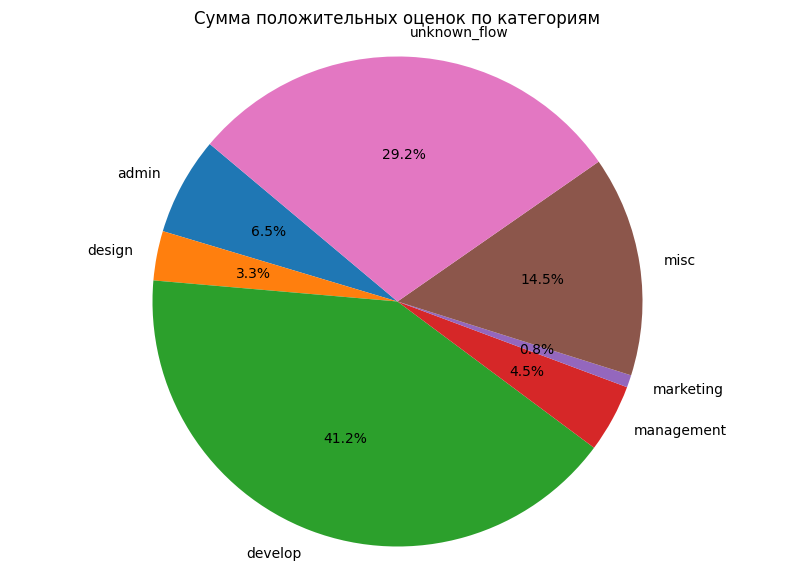

In [114]:
grouped_data = howpop_train.groupby('flow')['votes_plus'].sum().reset_index()

plt.figure(figsize=(10, 7))
plt.pie(grouped_data['votes_plus'], labels=grouped_data['flow'], autopct='%1.1f%%', startangle=140)
plt.title('Сумма положительных оценок по категориям')
plt.axis('equal')
plt.show()

Гипотеза подтвердилась на половину, больше всего положительных оценок у статей с категорией Develop, а категория unknown_flow вторая по количеству положительных оценок, наименьшее же количество положительных оценок у категории Marketing.